In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from rdd import rdd
from datetime import datetime

In [147]:
cov = pd.read_csv('Data/Covid_Cases_QC')

In [148]:
#cov['Day_sq'] = cov['Day'].apply(np.square)
cov['Date'] = pd.to_datetime(cov['Date'])
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [160]:
#Entire period we are looking at
period1_df = cov[(cov['Date'] > '2020-2-21') & (cov['Date'] <= '2020-4-24')]
period1_df['Day'] = (period1_df['Day'] - 1) #Make each time period start at day 0
period1_df['Day_sq'] = period1_df['Day'].apply(np.square) #Square days


pre_LD1 = period1_df[period1_df['Date']<=LOCKDOWN_1]
post_LD1 = period1_df[period1_df['Date']>LOCKDOWN_1]


period2_df = cov[(cov['Date'] > '2020-8-3') & (cov['Date'] <= '2020-10-12')]
period2_df.reset_index(inplace=True,drop=True) #Reset index for graphs to start at 0 and not day 163
period2_df['Day'] = (period2_df['Day'] - 163)
period2_df['Day_sq'] = period2_df['Day'].apply(np.square)


pre_sch = period2_df[period2_df['Date']<=SCHOOL_OPEN]
post_sch = period2_df[period2_df['Date']>SCHOOL_OPEN]



period3_df = cov[(cov['Date'] > '2020-11-27') & (cov['Date'] <= '2021-1-22')]
period3_df.reset_index(inplace=True,drop=True)
period3_df['Day'] = (period3_df['Day'] - 279)
period3_df['Day_sq'] = period3_df['Day'].apply(np.square)

pre_xmas = period3_df[period3_df['Date']<=LOCKDOWN_2]
post_xmas = period3_df[period3_df['Date']>LOCKDOWN_2]

<ipython-input-160-5e3907ec51a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period1_df['Day'] = (period1_df['Day'] - 1)
<ipython-input-160-5e3907ec51a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period1_df['Day_sq'] = period1_df['Day'].apply(np.square)
<ipython-input-160-5e3907ec51a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [196]:
#Pre-locdown

X = pre_LD1[['Day','Day_sq']]
X = sm.add_constant(X)

y = pre_LD1['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)


model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     8.573
Date:                Mon, 25 Jan 2021   Prob (F-statistic):            0.00165
Time:                        18:54:15   Log-Likelihood:                -106.21
No. Observations:                  26   AIC:                             218.4
Df Residuals:                      23   BIC:                             222.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7888      8.077      1.831      0.067      -1.042      30.619
Day           -5.4915      2.114     -2.597      0.009      -9.636      -1.347
Day_sq         0.3213      0.102      3.148      0.002       0.121       0.521
==============================================================================
Omnibus:                       17.835   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.721
Skew:                           1.380   Prob(JB):                     1.58e-06
Kurtosis:                       7.129   Cond. No.                         812.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [197]:
#Post-Lockdown

X = post_LD1[['Day','Day_sq']]
X = sm.add_constant(X)

y = post_LD1['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.34e-15
Time:                        18:54:16   Log-Likelihood:                -211.78
No. Observations:                  35   AIC:                             429.6
Df Residuals:                      32   BIC:                             434.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1798.8483    266.154     -6.759      0.000   -2320.500   -1277.197
Day          101.4974     13.429      7.558      0.000      75.177     127.818
Day_sq        -0.9579      0.155     -6.180      0.000      -1.262      -0.654
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.244
Skew:                          -0.185   Prob(JB):                        0.885
Kurtosis:                       2.828   Cond. No.                     4.21e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

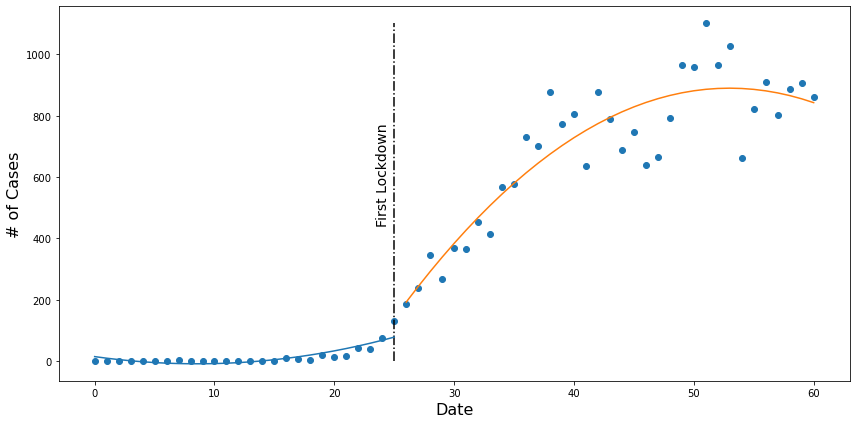

In [198]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period1_df.Day,y=period1_df.Cas,)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=450,x=23.5,s='First Lockdown',rotation=90,fontsize=14)
ax.vlines(x=25,ymin=period1_df.Cas.min(),ymax=period1_df.Cas.max(),linestyle='dashdot')
#plt.xticks(np.linspace(0,60,7),('24 Fev 20','4 Mar 20','14 Mar 20','24 Mar 20','3 Avr 20','13 Avr 20',
#                                '23 Avr 20'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [165]:
##################################################

In [187]:
#Pre-School Opening

X = pre_sch[['Day','Day_sq']]
X = sm.add_constant(X)

y = pre_sch['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     20.86
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.69e-06
Time:                        18:52:11   Log-Likelihood:                -120.81
No. Observations:                  28   AIC:                             247.6
Df Residuals:                      25   BIC:                             251.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.9803      8.556     16.361      0.000     123.211     156.750
Day           -9.7332      1.637     -5.944      0.000     -12.943      -6.524
Day_sq         0.3610      0.057      6.373      0.000       0.250       0.472
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.088
Skew:                          -0.483   Prob(JB):                        0.580
Kurtosis:                       2.985   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [188]:
#Post-School Opening

X = post_sch[['Day','Day_sq']]
X = sm.add_constant(X)

y = post_sch['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.96e-18
Time:                        18:52:12   Log-Likelihood:                -260.95
No. Observations:                  42   AIC:                             527.9
Df Residuals:                      39   BIC:                             533.1
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -855.7709    387.658     -2.208      0.027   -1615.567     -95.975
Day           34.1638     17.542      1.948      0.051      -0.217      68.545
Day_sq        -0.0748      0.189     -0.397      0.692      -0.445       0.295
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.248
Skew:                          -0.136   Prob(JB):                        0.883
Kurtosis:                       3.260   Cond. No.                     4.79e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

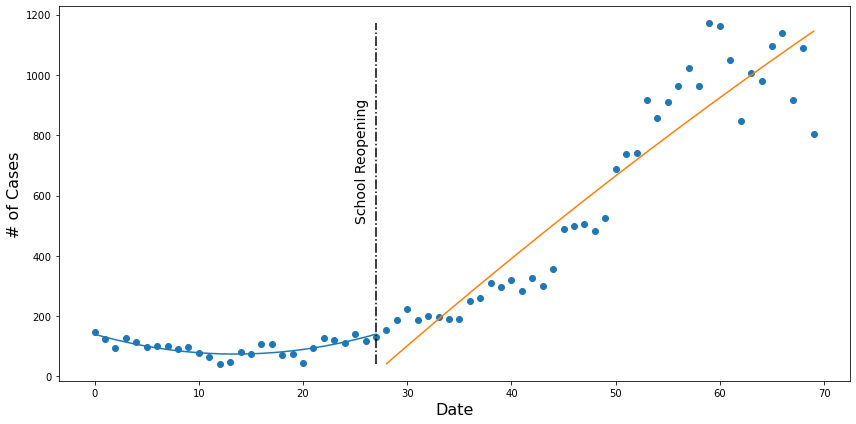

In [190]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period2_df.Day,y=period2_df.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=520,x=25,s='School Reopening',rotation=90,fontsize=14)
ax.vlines(x=27,ymin=period2_df.Cas.min(),ymax=period2_df.Cas.max(),linestyle='dashdot')
#plt.xticks(np.linspace(160,230,8),('1 Août 20','11 Août 20','21 Août 20','31 Août 20',
#                                   '10 Sept 20','20 Sept 20','30 Sept 20','10 Oct 20'))
plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [140]:
########################

In [176]:
#Pre-Xmas Lockdown

X = pre_xmas[['Day','Day_sq']]
X = sm.add_constant(X)

y = pre_xmas['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.03e-13
Time:                        18:50:37   Log-Likelihood:                -171.30
No. Observations:                  28   AIC:                             348.6
Df Residuals:                      25   BIC:                             352.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1370.1761     53.655     25.537      0.000    1265.015    1475.337
Day           35.1854      9.521      3.695      0.000      16.524      53.847
Day_sq         0.0144      0.320      0.045      0.964      -0.612       0.641
==============================================================================
Omnibus:                        1.768   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.046
Skew:                           0.472   Prob(JB):                        0.593
Kurtosis:                       3.078   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [177]:
#Post-Xmas Lockdown

X = post_xmas[['Day','Day_sq']]
X = sm.add_constant(X)

y = post_xmas['Cas']

model_2 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.03e-13
Time:                        18:50:38   Log-Likelihood:                -171.30
No. Observations:                  28   AIC:                             348.6
Df Residuals:                      25   BIC:                             352.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1370.1761     53.655     25.537      0.000    1265.015    1475.337
Day           35.1854      9.521      3.695      0.000      16.524      53.847
Day_sq         0.0144      0.320      0.045      0.964      -0.612       0.641
==============================================================================
Omnibus:                        1.768   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.046
Skew:                           0.472   Prob(JB):                        0.593
Kurtosis:                       3.078   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

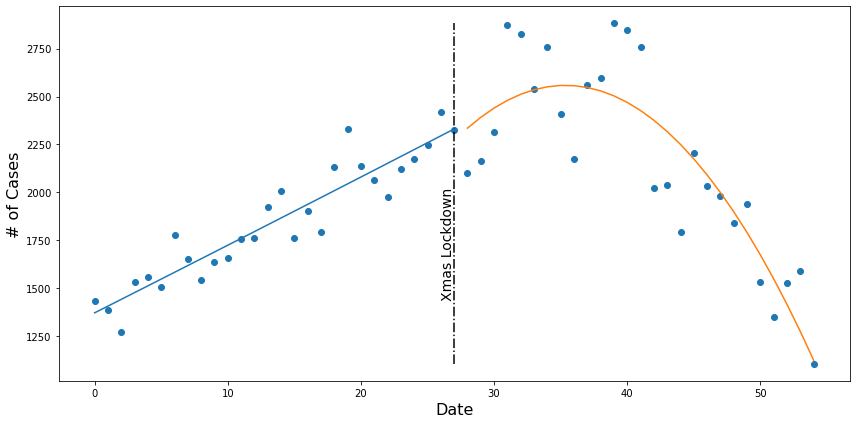

In [184]:

fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period3_df.Day,y=period3_df.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=1450,x=26,s='Xmas Lockdown',rotation=90,fontsize=14)
ax.vlines(x=27,ymin=period3_df.Cas.min(),ymax=period3_df.Cas.max(),linestyle='dashdot')
#plt.xticks(np.linspace(280,330,6),('29 Nov 20','9 Dec 20','19 Dec 20',
#                                   '29 Dec 20','8 Jan 21','18 Jan 21'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()